In [1]:
import pandas as pd
from nltk.tokenize import word_tokenize
from collections import Counter
import nltk
from io import StringIO

nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/hartejhs/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
# Load your Amazon Electronics Review CSV
df = pd.read_csv("electronics_sample.csv")

In [3]:
df.shape

(19809, 5)

In [4]:
df['reviewTime'].unique()
df['reviewTime'].value_counts()
df_sorted = df.sort_values(by='reviewTime')
df_sorted

print("Earliest date:", df['reviewTime'].min())
print("Latest date:", df['reviewTime'].max())


Earliest date: 2000-08-25
Latest date: 2018-09-24


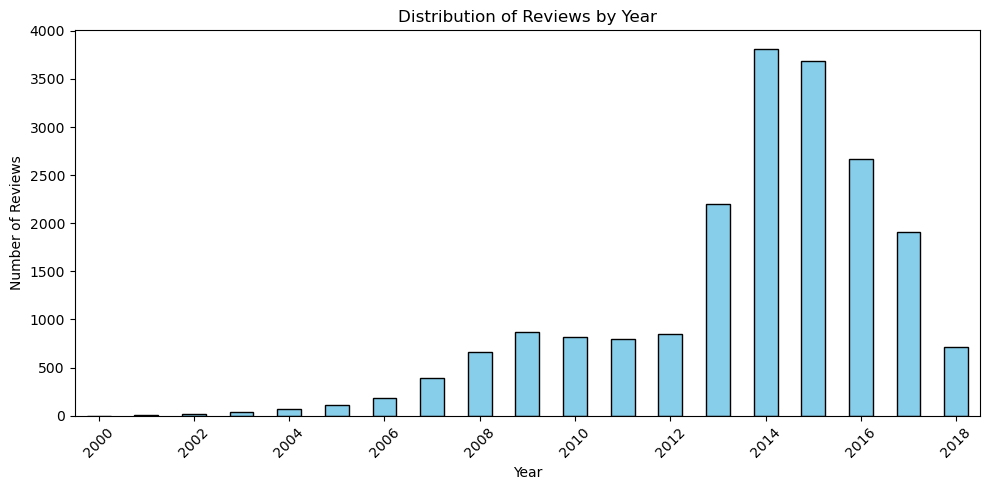

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'reviewTime' is datetime
df['reviewTime'] = pd.to_datetime(df['reviewTime'], errors='coerce')

# Extract year and count reviews by year
df['year'] = df['reviewTime'].dt.year
year_counts = df['year'].value_counts().sort_index()

# Create the barplot
plt.figure(figsize=(10, 5))
year_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Set plot titles and labels
plt.title("Distribution of Reviews by Year")
plt.xlabel("Year")
plt.ylabel("Number of Reviews")

# Set x-axis ticks to show every 2 years
plt.xticks(ticks=range(0, len(year_counts), 2),
           labels=year_counts.index[::2], rotation=45)

plt.tight_layout()
plt.show()


In [6]:
df['year'] = df['reviewTime'].dt.year
year_counts = df['year'].value_counts().sort_index()
print(year_counts)

year
2000       1
2001      11
2002      20
2003      40
2004      68
2005     116
2006     184
2007     390
2008     662
2009     872
2010     823
2011     795
2012     847
2013    2195
2014    3814
2015    3684
2016    2672
2017    1905
2018     710
Name: count, dtype: int64


In [7]:
df['review_length'] = df['reviewText'].str.split().str.len()
print(df['review_length'].describe())

count    19808.000000
mean        42.341579
std         90.874972
min          1.000000
25%          4.000000
50%          9.000000
75%         41.000000
max       2068.000000
Name: review_length, dtype: float64


In [8]:
df = df[df['review_length'] >= 5]
df = df[(df['year'] >= 2008) & (df['year'] <= 2017)]


In [9]:
df.shape

(12240, 7)

In [10]:
df['review_length'] = df['reviewText'].str.split().str.len()
print(df['review_length'].describe())

count    12240.000000
mean        56.096977
std        100.297147
min          5.000000
25%          8.000000
50%         21.000000
75%         62.000000
max       2068.000000
Name: review_length, dtype: float64


In [11]:
# See how many missing values per column
print(df.isna().sum())

overall          0
vote             0
reviewTime       0
reviewText       0
summary          0
year             0
review_length    0
dtype: int64


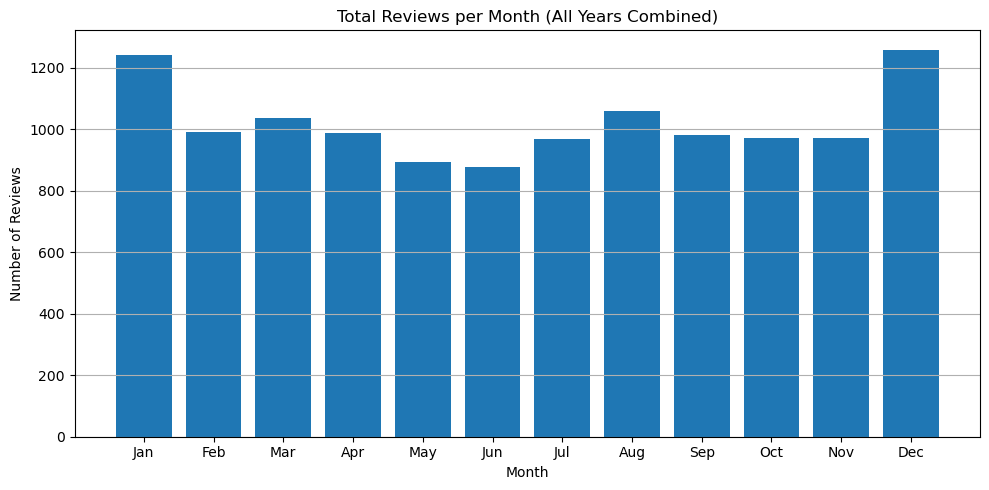

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'reviewTime' is in datetime format
df['reviewTime'] = pd.to_datetime(df['reviewTime'])

# Extract month and year
df['Month'] = df['reviewTime'].dt.month
df['Year'] = df['reviewTime'].dt.year

# Count total reviews by month (across all years)
monthly_total = df['Month'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 5))
plt.bar(monthly_total.index, monthly_total.values)
plt.title('Total Reviews per Month (All Years Combined)')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.xticks(ticks=range(1, 13), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [13]:
import re, string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download NLTK assets
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    if not isinstance(text, str): return ""
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [t for t in tokens if t not in stop_words and t not in string.punctuation and t != "'s"]
    lemmatized = [lemmatizer.lemmatize(t) for t in tokens]
    return " ".join(lemmatized)

df['cleaned'] = df['reviewText'].apply(preprocess)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hartejhs/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/hartejhs/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/hartejhs/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/hartejhs/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [14]:
df = df[['reviewText', 'reviewTime', 'year', "overall"]]
df

reviewText reviewTime  year  \
0                              Tech support is the worst 2010-02-10  2010   
1      Screws were missing from the bracket and beaut... 2016-10-24  2016   
2      Trouble connecting and staying connected via b... 2017-07-10  2017   
3      I purchased this unit for our RV to replace an... 2013-05-02  2013   
4      It works.  Nuff said but the review requires 1... 2013-01-04  2013   
...                                                  ...        ...   ...   
19801  Having just finished wall mounting four speake... 2011-06-26  2011   
19802  There are several kinds of plugs for Firewire.... 2013-05-11  2013   
19804                 rendering lens useless in darkness 2014-11-11  2014   
19806                         Decent Cable for the Money 2009-03-27  2009   
19807           OK drop protection for reasonable price. 2014-06-06  2014   

       overall  
0            2  
1            2  
2            1  
3            4  
4            3  
...        ...  
19801        5  
19802        3  
19804        3  
19806        4  
19807        3  

[12240 rows x 4 columns]

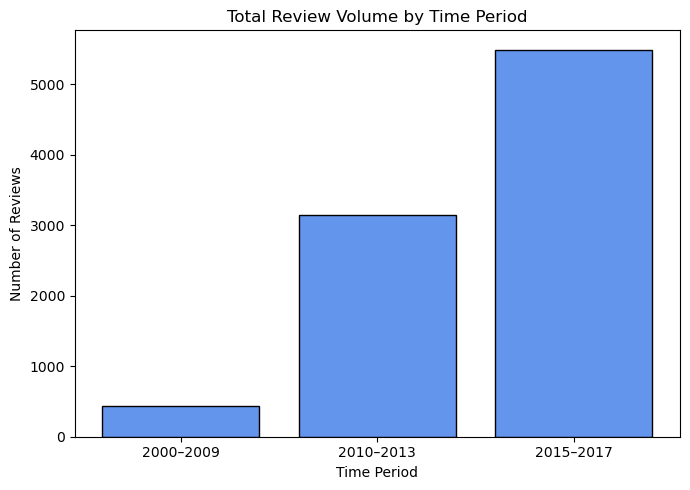

In [15]:
import matplotlib.pyplot as plt

# Group review counts into custom time windows
periods = {
    "2000–2009": df[df['year'].between(2000, 2008)],
    "2010–2013": df[df['year'].between(2010, 2013)],
    "2015–2017": df[df['year'].between(2015, 2017)],
}

# Calculate total reviews per period
period_counts = {label: group.shape[0] for label, group in periods.items()}

# Plot
plt.figure(figsize=(7, 5))
plt.bar(period_counts.keys(), period_counts.values(), color='cornflowerblue', edgecolor='black')

plt.title("Total Review Volume by Time Period")
plt.ylabel("Number of Reviews")
plt.xlabel("Time Period")
plt.tight_layout()
plt.show()


In [16]:
import pandas as pd
import re
from collections import Counter
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk

# Rebuild full NRC pivot table from .txt
from collections import defaultdict

emotion_dict = defaultdict(lambda: defaultdict(int))

with open('NRC-Emotion-Lexicon-Wordlevel-v0.92.txt', 'r') as f:
    for line in f:
        word, emotion, value = line.strip().split('\t')
        if int(value) == 1:
            emotion_dict[word][emotion] = 1

# Convert to DataFrame
nrc_pivot = pd.DataFrame.from_dict(emotion_dict, orient='index').fillna(0).astype(int)
emotion_words = set(nrc_pivot.index)


In [17]:
df['cleaned'] = df['reviewText'].apply(preprocess)

In [18]:
df

reviewText reviewTime  year  \
0                              Tech support is the worst 2010-02-10  2010   
1      Screws were missing from the bracket and beaut... 2016-10-24  2016   
2      Trouble connecting and staying connected via b... 2017-07-10  2017   
3      I purchased this unit for our RV to replace an... 2013-05-02  2013   
4      It works.  Nuff said but the review requires 1... 2013-01-04  2013   
...                                                  ...        ...   ...   
19801  Having just finished wall mounting four speake... 2011-06-26  2011   
19802  There are several kinds of plugs for Firewire.... 2013-05-11  2013   
19804                 rendering lens useless in darkness 2014-11-11  2014   
19806                         Decent Cable for the Money 2009-03-27  2009   
19807           OK drop protection for reasonable price. 2014-06-06  2014   

       overall                                            cleaned  
0            2                                 tech support worst  
1            2  screw missing bracket beauty dish within week ...  
2            1  trouble connecting staying connected via bluet...  
3            4  purchased unit rv replace older am/fm/cassette...  
4            3  work nuff said review requires 16 word 9 word ...  
...        ...                                                ...  
19801        5  finished wall mounting four speaker applaud de...  
19802        3  several kind plug firewire one need 'm sure ot...  
19804        3                    rendering lens useless darkness  
19806        4                                 decent cable money  
19807        3                ok drop protection reasonable price  

[12240 rows x 5 columns]

In [19]:
import matplotlib.pyplot as plt
from collections import Counter
import re
import pandas as pd

def compare_emotion_distributions(text1, text2, label1='Group 1', label2='Group 2'):
    def get_emotion_pct(text):
        words = [w for w in re.findall(r'\b\w+\b', text.lower()) if w in emotion_words]
        emotions = []
        for word in words:
            if word in nrc_pivot.index:
                emotions += nrc_pivot.columns[nrc_pivot.loc[word] == 1].tolist()
        counts = Counter(emotions)
        total = sum(counts.values())
        return {emo: (counts.get(emo, 0) / total * 100) if total > 0 else 0 for emo in fixed_order}

    fixed_order = ['positive', 'negative', 'trust', 'anticipation', 'joy',
                   'sadness', 'surprise', 'fear', 'anger', 'disgust']

    if isinstance(text1, pd.Series):
        text1 = " ".join(text1.astype(str))
    if isinstance(text2, pd.Series):
        text2 = " ".join(text2.astype(str))

    pct1 = get_emotion_pct(text1)
    pct2 = get_emotion_pct(text2)

    # Combine into DataFrame
    df = pd.DataFrame({
        'Emotion': fixed_order,
        label1: [pct1[e] for e in fixed_order],
        label2: [pct2[e] for e in fixed_order]
    })

    # Plot
    x = range(len(fixed_order))
    width = 0.35

    plt.figure(figsize=(10, 5))
    plt.bar([i - width/2 for i in x], df[label1], width, label=label1, color='skyblue')
    plt.bar([i + width/2 for i in x], df[label2], width, label=label2, color='salmon')

    plt.xticks(x, fixed_order, rotation=45)
    plt.ylabel('Emotion %')
    plt.title(f'NRC Emotion Comparison: {label1} vs. {label2}')
    plt.legend()
    plt.tight_layout()
    plt.show()

    return df


In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
from collections import Counter

def emotion_wordcloud(text, label):
    # Extract words found in the NRC lexicon
    words = [w for w in re.findall(r'\b\w+\b', text) if w in emotion_words]

    # Map each word to its emotion labels
    emotions = []
    for word in words:
        if word in nrc_pivot.index:
            emotions += nrc_pivot.columns[nrc_pivot.loc[word] == 1].tolist()

    # Count frequency of emotion labels
    freq = Counter(emotions)

    # Plot word cloud
    if freq:
        wordcloud = WordCloud(background_color='white', max_words=100).generate_from_frequencies(freq)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'NRC Emotion WordCloud – {label}')
        plt.show()
    else:
        print(f"No emotion categories found in {label}.")


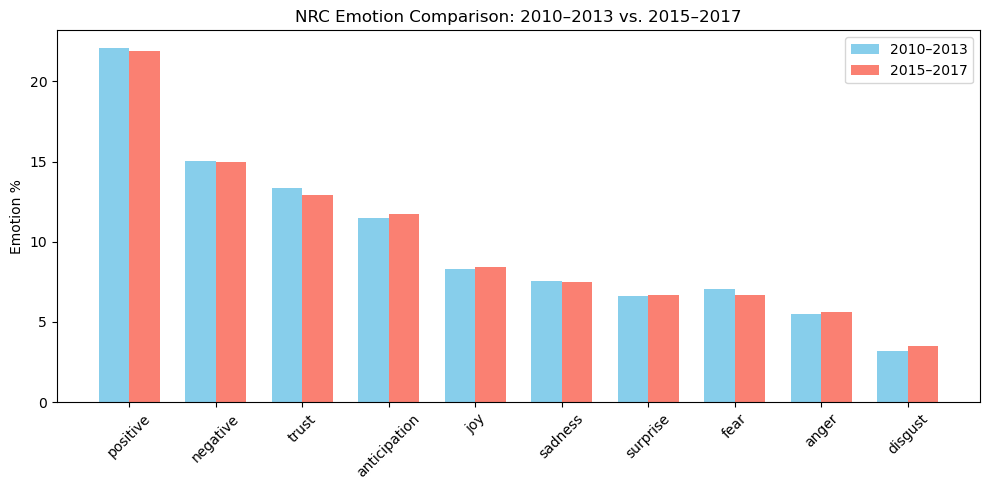

Emotion  2010–2013  2015–2017
0      positive  22.072881  21.895543
1      negative  15.056321  14.979157
2         trust  13.317327  12.932900
3  anticipation  11.452677  11.756453
4           joy   8.275367   8.449575
5       sadness   7.523673   7.507616
6      surprise   6.623884   6.669873
7          fear   7.021047   6.655844
8         anger   5.484001   5.639731
9       disgust   3.172822   3.513308

In [21]:
# Step 1: Subset by year
early = df[(df['year'] >= 2010) & (df['year'] <= 2013)]
late  = df[(df['year'] >= 2015) & (df['year'] <= 2017)]

# Step 2: Join cleaned text
early_text = ' '.join(early['cleaned'].dropna())
late_text  = ' '.join(late['cleaned'].dropna())

# Step 3: Side-by-side emotion comparison
compare_emotion_distributions(early_text, late_text, label1="2010–2013", label2="2015–2017")


In [22]:
early.shape

(3150, 5)

In [23]:
late.shape

(5488, 5)

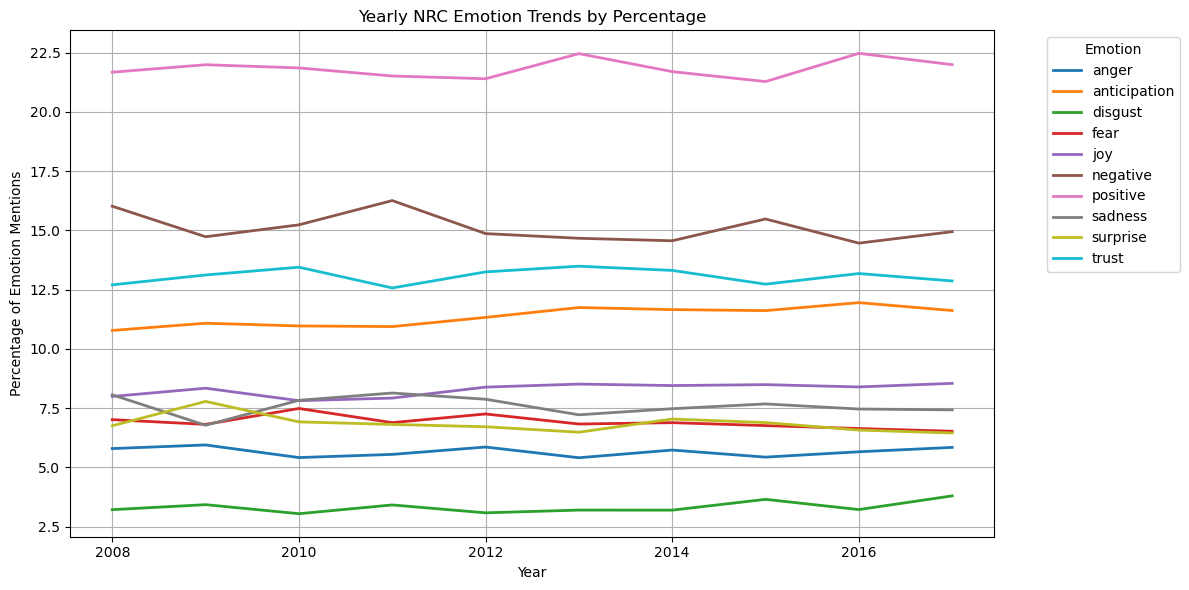

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract year
df['year'] = df['reviewTime'].dt.year

# Step 1: Build (year, emotion) records
emotion_records = []
for _, row in df.iterrows():
    words = [w for w in str(row['cleaned']).split() if w in emotion_words]
    for word in words:
        if word in nrc_pivot.index:
            emotions = nrc_pivot.columns[nrc_pivot.loc[word] == 1]
            for emo in emotions:
                emotion_records.append({'year': row['year'], 'emotion': emo})

# Step 2: Convert to DataFrame
emotion_df = pd.DataFrame(emotion_records)

# Step 3: Group by year and emotion, then normalize
emotion_counts = emotion_df.groupby(['year', 'emotion']).size().unstack(fill_value=0).sort_index()
emotion_pct = emotion_counts.div(emotion_counts.sum(axis=1), axis=0) * 100  # Normalize to percentage

# Step 4: Plot
ax = emotion_pct.plot(figsize=(12, 6), linewidth=2)
ax.set_title("Yearly NRC Emotion Trends by Percentage")
ax.set_ylabel("Percentage of Emotion Mentions")
ax.set_xlabel("Year")
ax.legend(title="Emotion", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [25]:
# Step 1: Imports
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS
from umap import UMAP
from scipy.cluster import hierarchy as sch
import pandas as pd

# Step 2: Define custom vectorizer and UMAP model
vectorizer_model = CountVectorizer(ngram_range=(1, 2))

umap_model = UMAP(
    n_neighbors=15,
    n_components=5,
    min_dist=0.0,
    metric='cosine'
)

# Step 3: Prepare documents
docs = df['cleaned'].tolist()

# Step 4: Initialize and fit BERTopic
topic_model = BERTopic(umap_model=umap_model, vectorizer_model=vectorizer_model)
topics, _ = topic_model.fit_transform(docs)

# Step 5: Create DataFrame with topics
df_topics = pd.DataFrame({
    'doc': docs,
    'topic_id': topics
})


In [26]:

# # 4. View top topics
# print(topic_model.get_topic_info())  # Topic IDs and keywords

# # 5. View a specific topic (e.g., topic 1)
# print(topic_model.get_topic(1))

In [27]:
df_topics.head(10)

doc  topic_id
0                                 tech support worst        -1
1  screw missing bracket beauty dish within week ...         3
2  trouble connecting staying connected via bluet...        -1
3  purchased unit rv replace older am/fm/cassette...         0
4  work nuff said review requires 16 word 9 word ...        42
5  bought viper alarm civic took shop get install...        20
6  rescue cat one stay forever sprayer periodical...       103
7  purchased 6 2007 ~doa port recognized usb devi...        -1
8  nice cover something better nothing durable us...         8
9  problem sound quality able enjoy headphone sho...         0

In [28]:
# # Print top 10 words for each topic
# for topic_id in topic_model.get_topic_info()['Topic']:
#     if topic_id == -1:
#         continue  # skip outlier topic
#     words = topic_model.get_topic(topic_id)
#     top_words = [word for word, _ in words]
#     print(f"Topic {topic_id}: {', '.join(top_words)}")

In [29]:
# topic_model.visualize_barchart(top_n_topics=10)

100%|██████████| 163/163 [00:01<00:00, 127.13it/s]


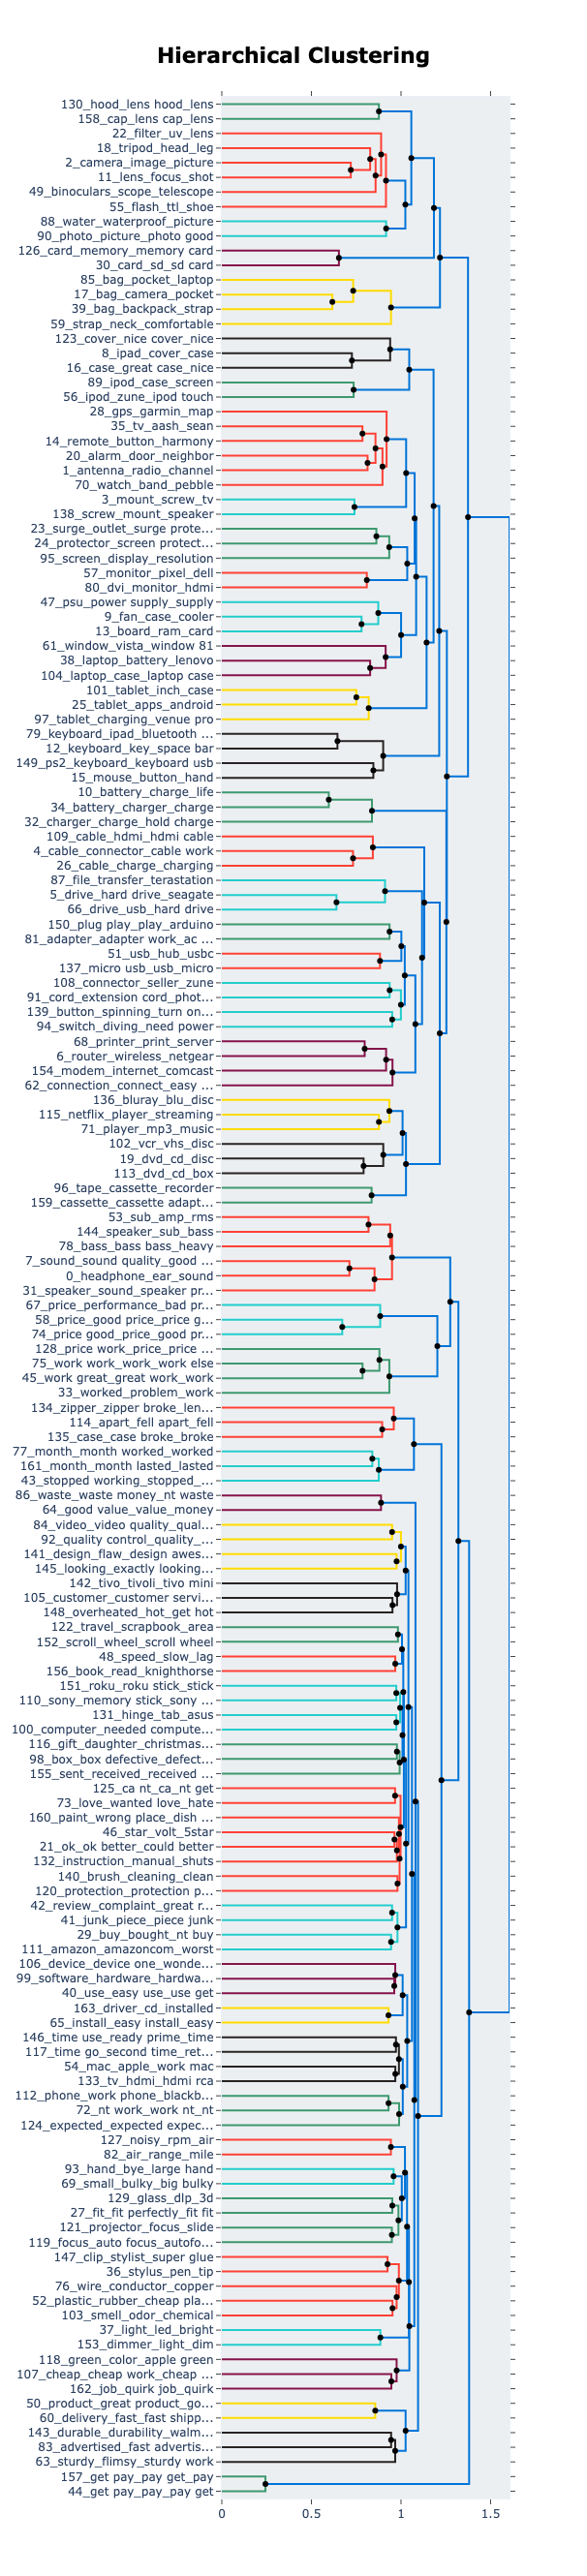

In [30]:
# Step 6: Define linkage function and generate hierarchical topics
linkage_func = lambda x: sch.linkage(x, method='single', optimal_ordering=True)
hierarchical_topics = topic_model.hierarchical_topics(docs, linkage_function=linkage_func)

# Step 7: Visualize hierarchy
topic_model.visualize_hierarchy(hierarchical_topics=hierarchical_topics)


In [31]:
hierarchical_topics = topic_model.hierarchical_topics(docs)

100%|██████████| 163/163 [00:00<00:00, 215.60it/s]


In [32]:
hierarchical_topics

Parent_ID                         Parent_Name  \
162       326                nt_one_work_good_get   
161       325    headphone_sound_ear_good_headset   
160       324            camera_nt_one_would_case   
159       323    headphone_sound_ear_good_headset   
158       322    headphone_ear_sound_headset_bass   
..        ...                                 ...   
4         168       keyboard_key_ipad_type_typing   
3         167   drive_hard drive_seagate_hard_ssd   
2         166    bag_backpack_camera_pocket_strap   
1         165  battery_charge_charger_camera_life   
0         164    get pay_pay get_pay_get_paid get   

                                                Topics Child_Left_ID  \
162  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...           324   
161  [0, 7, 21, 27, 29, 31, 33, 36, 37, 40, 41, 42,...           323   
160  [1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 1...           318   
159  [0, 7, 21, 27, 29, 31, 33, 36, 37, 40, 41, 42,...           322   
158  [0, 7, 31, 33, 45, 53, 58, 67, 74, 75, 78, 128...           236   
..                                                 ...           ...   
4                                             [12, 79]            79   
3                                              [5, 66]             5   
2                                             [17, 39]            17   
1                                             [10, 34]            10   
0                                            [44, 157]           157   

                                       Child_Left_Name Child_Right_ID  \
162                           camera_nt_one_would_case            325   
161                   headphone_sound_ear_good_headset            164   
160                       camera_lens_bag_filter_canon            321   
159                   headphone_ear_sound_headset_bass            319   
158                   headphone_ear_sound_headset_bass            315   
..                                                 ...            ...   
4    keyboard_ipad_bluetooth keyboard_key_keyboard ...             12   
3                  drive_hard drive_seagate_ssd_backup             66   
2                         bag_camera_pocket_lens_strap             39   
1                battery_charge_life_battery life_nicd             34   
0                     get pay_pay get_pay_get_done rip             44   

                               Child_Right_Name  Distance  
162            headphone_sound_ear_good_headset  1.605589  
161            get pay_pay get_pay_get_paid get  1.380221  
160                   nt_case_one_drive_battery  1.374128  
159                  work_stylus_light_nt_great  1.320342  
158  price_work work_work_price good_good price  1.274868  
..                                          ...       ...  
4             keyboard_key_space bar_type_space  0.645365  
3                 drive_usb_hard drive_ide_sata  0.639843  
2                 bag_backpack_strap_gear_carry  0.616907  
1          battery_charger_charge_camera_kastar  0.596965  
0              get pay_pay_pay get_get_paid get  0.243464  

[163 rows x 8 columns]

In [33]:
# 1. Make sure 'cleaned' column exists and is string
df['cleaned'] = df['cleaned'].astype(str)

# 2. Define NRC emotion extraction function
def get_emotions(text):
    return [emo for word in text.split() if word in nrc_pivot.index
            for emo in nrc_pivot.columns[nrc_pivot.loc[word] == 1]]

# 3. Apply to cleaned text column
df['nrc_emotions'] = df['cleaned'].apply(get_emotions)


In [34]:
df[['cleaned', 'nrc_emotions']].sample(3)

cleaned  \
11583  'm training neural network take day week compl...   
9108                              good thermal paste say   
7514   relatively low-cost canon really fantastic pic...   

                                            nrc_emotions  
11583  [anticipation, trust, negative, fear, negative...  
9108      [trust, surprise, positive, joy, anticipation]  
7514                                                  []

In [35]:
# Step 1: Create a copy of just the cleaned text for transformation
docs_clean = df['cleaned'].tolist()

# Step 2: Get topics from the model
topics, _ = topic_model.transform(docs_clean)

# Step 3: Assign to a new DataFrame with aligned index
df_topic_labeled = df.copy()
df_topic_labeled['topic'] = topics

In [36]:
# Step 1: Automatically define target_topics as all valid (non-noise) topic IDs
target_topics = sorted(df_topic_labeled['topic'].dropna().unique())
target_topics = [t for t in target_topics if t != -1]

# Step 2: Filter for those topics (same exact code structure as before)
df_subset = df_topic_labeled[df_topic_labeled['topic'].isin(target_topics)].copy()

In [37]:
def wordclouds_per_emotion(text, label):
    if isinstance(text, pd.Series):
        text = " ".join(text.astype(str))  # safely join all reviews

    words = [w for w in re.findall(r'\b\w+\b', text) if w in emotion_words]
    
    # Build emotion → word mapping
    emotion_word_map = {emotion: [] for emotion in nrc_pivot.columns}
    for word in words:
        if word in nrc_pivot.index:
            emotions = nrc_pivot.columns[nrc_pivot.loc[word] == 1]
            for emo in emotions:
                emotion_word_map[emo].append(word)
    
    # Plot word clouds
    for emotion, word_list in emotion_word_map.items():
        if word_list:
            freq = Counter(word_list).most_common(50)
            wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(freq))
            plt.figure(figsize=(6, 3))
            plt.imshow(wordcloud, interpolation='bilinear')
            plt.axis('off')
            plt.title(f"{label} — {emotion.capitalize()}")
            plt.tight_layout()
            plt.show()


In [38]:
from collections import Counter
import re

def get_emotion_distribution(text):
    words = re.findall(r'\b\w+\b', text.lower())
    emotion_counter = Counter()

    for word in words:
        if word in nrc_pivot.index:
            emotions = nrc_pivot.columns[nrc_pivot.loc[word] == 1]
            emotion_counter.update(emotions)

    return emotion_counter


In [39]:
# Store results in a dict
topic_emotion_summary = {}

for topic_id in target_topics:
    topic_reviews = df_subset[df_subset['topic'] == topic_id]['cleaned'].dropna()
    all_emotions = Counter()

    for review in topic_reviews:
        all_emotions += get_emotion_distribution(review)

    total = sum(all_emotions.values())
    if total > 0:
        pct = {emotion: (count / total) * 100 for emotion, count in all_emotions.items()}
        topic_emotion_summary[topic_id] = pct


In [40]:
import matplotlib.pyplot as plt
from collections import Counter

def plot_emotion_comparison(df, topic_id, fixed_order, early_range=(2010, 2013), late_range=(2015, 2017)):
    # Filter for topic and time windows
    early = df[(df['topic'] == topic_id) & df['year'].between(*early_range)]
    late  = df[(df['topic'] == topic_id) & df['year'].between(*late_range)]

    # Flatten emotion lists
    early_emotions = [e for row in early['nrc_emotions'] for e in row]
    late_emotions  = [e for row in late['nrc_emotions'] for e in row]

    # Count and normalize
    def normalize(counts):
        total = sum(counts.values()) or 1
        return [100 * counts.get(e, 0) / total for e in fixed_order]

    early_counts = Counter(early_emotions)
    late_counts = Counter(late_emotions)

    early_pct = normalize(early_counts)
    late_pct  = normalize(late_counts)

    # Plotting
    x = range(len(fixed_order))
    width = 0.35

    plt.figure(figsize=(10, 4))
    bars1 = plt.bar([i - width/2 for i in x], early_pct, width, label=f'{early_range[0]}–{early_range[1]}', color='skyblue')
    bars2 = plt.bar([i + width/2 for i in x], late_pct, width, label=f'{late_range[0]}–{late_range[1]}', color='salmon')

    for bar1, bar2 in zip(bars1, bars2):
        plt.text(bar1.get_x() + bar1.get_width()/2, bar1.get_height() + 0.5, f"{bar1.get_height():.1f}%", ha='center', fontsize=8)
        plt.text(bar2.get_x() + bar2.get_width()/2, bar2.get_height() + 0.5, f"{bar2.get_height():.1f}%", ha='center', fontsize=8)

    plt.xticks(x, fixed_order, rotation=45)
    plt.ylabel('Emotion %')
    plt.title(f'NRC Emotion Comparison — Topic {topic_id}')
    plt.legend()
    plt.tight_layout()
    plt.show()


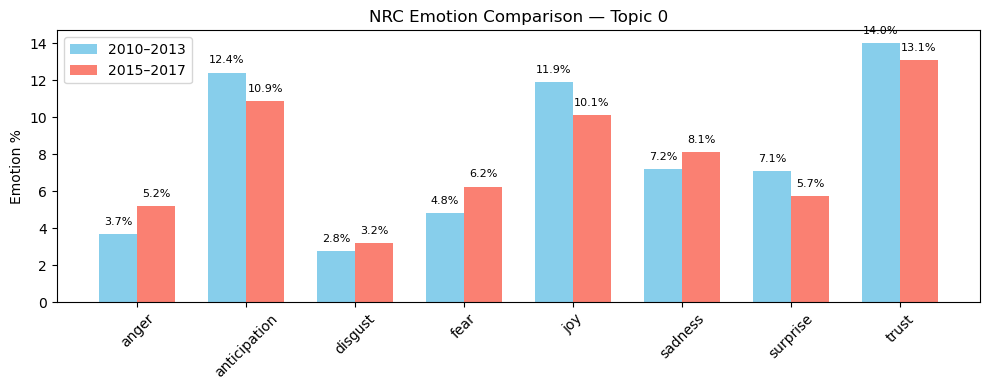

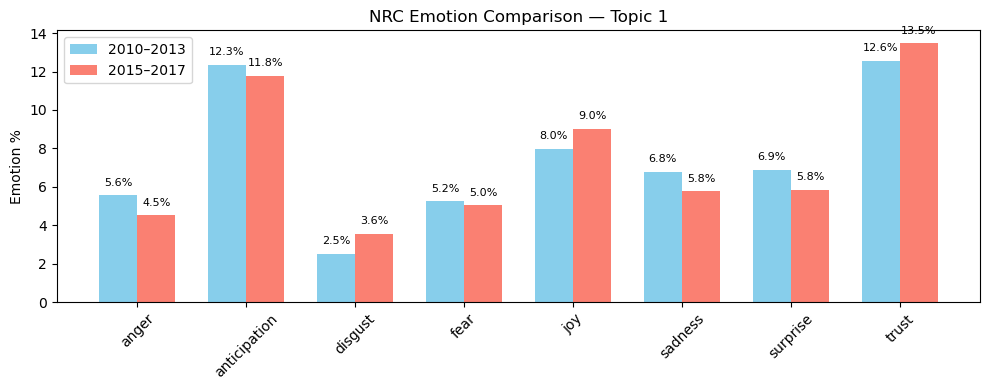

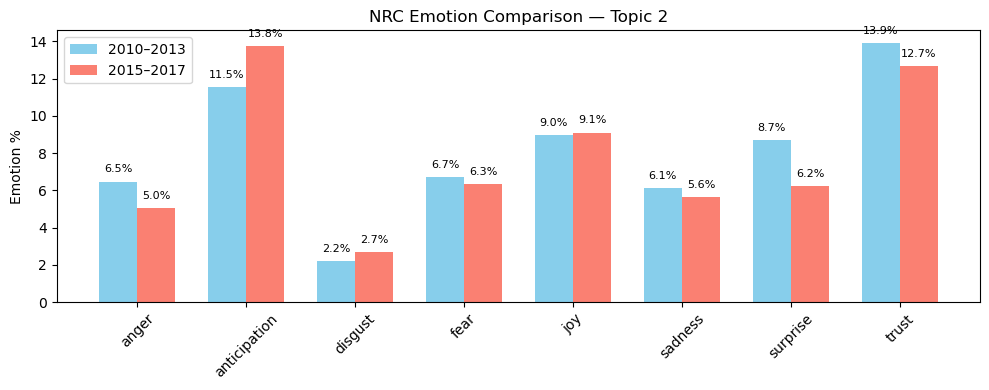

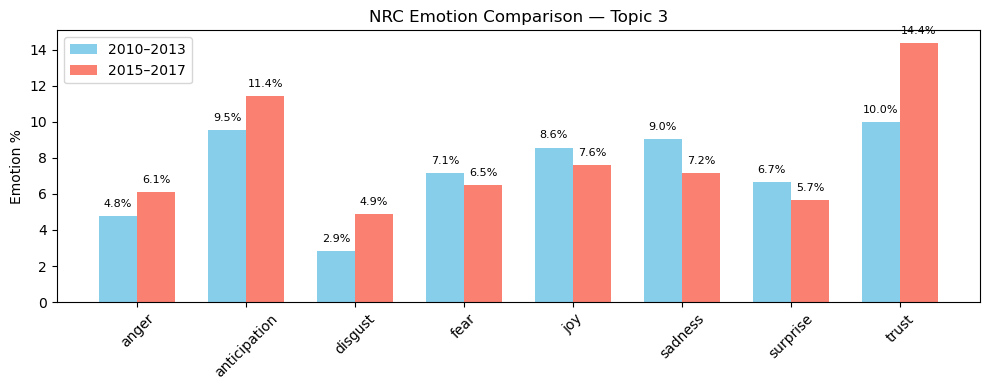

In [41]:
fixed_order = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']

# Loop through multiple topics
for tid in [0, 1, 2, 3]:
    plot_emotion_comparison(df_topic_labeled, topic_id=tid, fixed_order=fixed_order)


🧾 Code: NRC Emotion Word Count Per Topic


In [43]:
from collections import Counter, defaultdict
import pandas as pd

# Create dictionary to store emotion word counts per topic
topic_emotion_counts = defaultdict(lambda: {
    'total_nrc_words': 0,
    'emotion_distribution': Counter()
})

# Iterate through each row in df_topic_labeled
for _, row in df_topic_labeled.iterrows():
    topic = row['topic']
    emotions = row.get('nrc_emotions')

    if topic != -1 and isinstance(emotions, list):  # Exclude noise topic
        count = Counter(emotions)
        topic_emotion_counts[topic]['total_nrc_words'] += sum(count.values())
        topic_emotion_counts[topic]['emotion_distribution'].update(count)

# Convert to DataFrame for inspection
topic_stats = []
for topic_id, data in topic_emotion_counts.items():
    row = {'topic': topic_id, 'total_nrc_words': data['total_nrc_words']}
    row.update(data['emotion_distribution'])
    topic_stats.append(row)

topic_nrc_df = pd.DataFrame(topic_stats).fillna(0).sort_values('total_nrc_words', ascending=False)

# Show top 10 emotionally dense topics
topic_nrc_df.head(10)


topic  total_nrc_words   fear  negative  sadness  positive     joy  \
1       0            11321  620.0    1560.0    862.0      2597  1216.0   
8       2             4971  326.0     641.0    301.0      1149   457.0   
43      1             3498  179.0     415.0    195.0      1005   315.0   
5       8             2452  298.0     414.0    310.0       425   182.0   
3      20             2440  268.0     386.0    121.0       463   160.0   
64      6             2369  148.0     277.0    167.0       530   159.0   
46     11             2367  154.0     281.0    168.0       558   234.0   
13      5             2082  171.0     318.0    189.0       466   132.0   
0       3             2080  128.0     296.0    145.0       482   168.0   
11      9             2046  202.0     378.0    242.0       441   126.0   

     trust  surprise  disgust  anticipation  anger  
1   1522.0     741.0    350.0        1305.0  548.0  
8    673.0     387.0    126.0         604.0  307.0  
43   456.0     229.0    107.0         431.0  166.0  
5    400.0     100.0     62.0         188.0   73.0  
3    326.0     227.0     61.0         310.0  118.0  
64   281.0     203.0     70.0         372.0  162.0  
46   322.0     186.0     69.0         250.0  145.0  
13   283.0     105.0     87.0         222.0  109.0  
0    295.0     120.0     85.0         242.0  119.0  
11   229.0      89.0     48.0         212.0   79.0

In [44]:
# 0,1,2,9 top 4 topcis by emount of NRC words

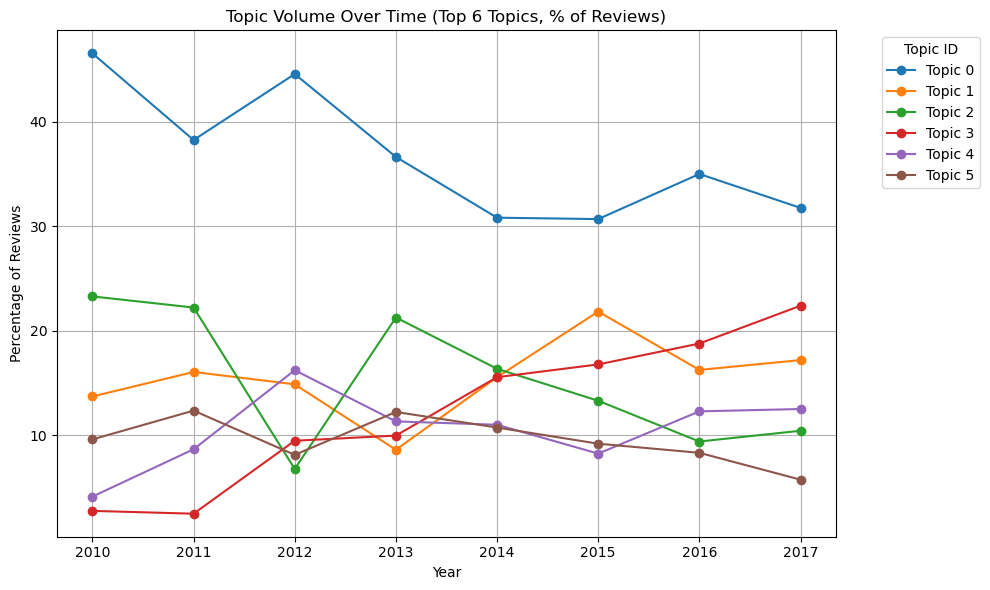

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Assumes df_topic_labeled contains 'topic' and 'year' columns
# Filter valid (non-noise) topics and years between 2010–2017
df_filtered = df_topic_labeled[
    (df_topic_labeled['topic'] != -1) & 
    (df_topic_labeled['year'].between(2010, 2017))
]

# Choose top 6 topics by total frequency
top_topics = (
    df_filtered['topic']
    .value_counts()
    .head(6)
    .index
    .tolist()
)

# Subset to just those top topics
df_top = df_filtered[df_filtered['topic'].isin(top_topics)]

# Count reviews per (year, topic)
topic_year_counts = (
    df_top.groupby(['year', 'topic'])
    .size()
    .unstack(fill_value=0)
)

# Normalize: % of reviews assigned to each topic per year
topic_year_pct = topic_year_counts.div(topic_year_counts.sum(axis=1), axis=0) * 100

# Plot line chart
plt.figure(figsize=(10, 6))
for topic_id in topic_year_pct.columns:
    plt.plot(topic_year_pct.index, topic_year_pct[topic_id], marker='o', label=f'Topic {topic_id}')

plt.title('Topic Volume Over Time (Top 6 Topics, % of Reviews)')
plt.xlabel('Year')
plt.ylabel('Percentage of Reviews')
plt.xticks(topic_year_pct.index)
plt.legend(title='Topic ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [46]:
# Convert set to list before indexing
all_emotions = list(nrc_pivot.columns)

# Filter: total NRC words ≥ 1000 and all 10 NRC emotions > 0
eligible_nrc_df = topic_nrc_df[
    (topic_nrc_df['total_nrc_words'] >= 1000) &
    (topic_nrc_df[all_emotions].gt(0).all(axis=1))
]


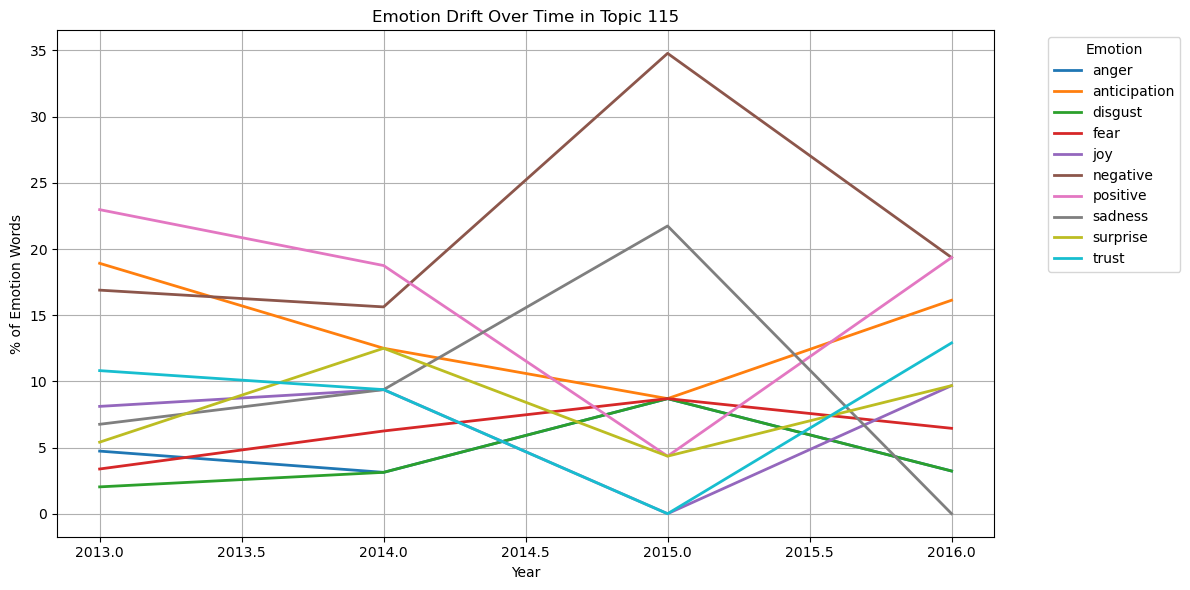

In [47]:
topic_id = 115
df_topic_year = df_topic_labeled[df_topic_labeled['topic'] == topic_id]

# Flatten into (year, emotion) rows
emotion_records = []
for _, row in df_topic_year.iterrows():
    for emo in row['nrc_emotions']:
        emotion_records.append((row['year'], emo))

emotion_topic_df = pd.DataFrame(emotion_records, columns=['year', 'emotion'])
topic_year_counts = emotion_topic_df.groupby(['year', 'emotion']).size().unstack(fill_value=0)
topic_year_pct = topic_year_counts.div(topic_year_counts.sum(axis=1), axis=0) * 100

# Plot
topic_year_pct.plot(figsize=(12, 6), linewidth=2)
plt.title(f"Emotion Drift Over Time in Topic {topic_id}")
plt.ylabel("% of Emotion Words")
plt.xlabel("Year")
plt.legend(title="Emotion", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


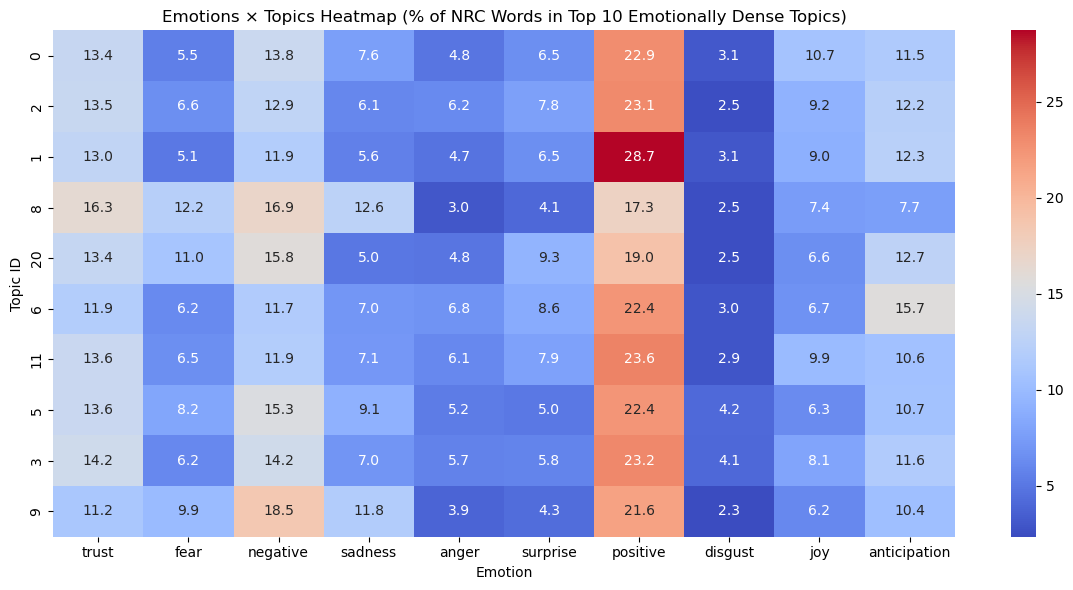

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# Step 1: Build topic_emotion_data with % and total count
topic_emotion_data = {}
for topic in df_topic_labeled['topic'].unique():
    if topic == -1:
        continue  # Skip noise topic
    subset = df_topic_labeled[df_topic_labeled['topic'] == topic]
    flat_emotions = [e for row in subset['nrc_emotions'] if isinstance(row, list) for e in row]
    if flat_emotions:
        total = len(flat_emotions)
        counts = Counter(flat_emotions)
        pct = {emo: 100 * counts.get(emo, 0) / total for emo in nrc_pivot.columns}
        pct['total_nrc_words'] = total
        topic_emotion_data[topic] = pct

# Step 2: Convert to DataFrame
topic_emotion_df = pd.DataFrame(topic_emotion_data).T.fillna(0)

# Step 3: Filter to top 10 topics by total NRC emotion word count
top_10 = topic_emotion_df.sort_values('total_nrc_words', ascending=False).head(10).index
heatmap_df = topic_emotion_df.loc[top_10].drop(columns='total_nrc_words')

# Step 4: Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_df, cmap='coolwarm', annot=True, fmt=".1f")
plt.title("Emotions × Topics Heatmap (% of NRC Words in Top 10 Emotionally Dense Topics)")
plt.xlabel("Emotion")
plt.ylabel("Topic ID")
plt.tight_layout()
plt.show()


# CLuster Analysis

In [50]:
import pandas as pd

# Load hierarchical topics (cluster_csv_amazon.csv)
df_clusters = pd.read_csv("cluster_csv_amazon.csv")

# Convert 'Topics' string column into actual Python lists
import ast
df_clusters['Topics'] = df_clusters['Topics'].apply(ast.literal_eval)

# Build Parent_ID → set(child topic IDs) mapping
cluster_dict = {
    row['Parent_ID']: set(row['Topics'])
    for _, row in df_clusters.iterrows()
}


In [51]:
cluster_326_topics = cluster_dict[321]
print(sorted(cluster_326_topics))

[7, 17, 18, 25, 33, 64, 95, 101, 114, 128, 139, 145, 153, 163]


In [52]:
import pandas as pd

# Start from your original cluster_dict
rows = []
for cluster_id, topic_ids in cluster_dict.items():
    rows.append({
        'cluster_id': cluster_id,
        'topics': sorted(topic_ids),
        'num_topics': len(topic_ids)
    })

df_cluster_meta = pd.DataFrame(rows)


In [53]:
from scipy.cluster.hierarchy import linkage, fcluster
import numpy as np
import pandas as pd

# Step 1: Get topic embeddings (excluding noise topic -1)
valid_topic_ids = [tid for tid in topic_model.get_topic_info()['Topic'] if tid != -1]
topic_embeddings = np.array([topic_model.topic_embeddings_[tid] for tid in valid_topic_ids])

# Step 2: Build linkage matrix from embeddings
linkage_matrix = linkage(topic_embeddings, method='ward')

# Step 3: Cut dendrogram into desired number of clusters
num_clusters = 15
topic_cluster_labels = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Step 4: Map topic_id → cluster_label (only for non-noise topics)
topic_to_newcluster = dict(zip(valid_topic_ids, topic_cluster_labels))

# Step 5: Create a new column without touching the original
df_topic_labeled['cluster_fixed15'] = df_topic_labeled['topic'].map(topic_to_newcluster)


In [54]:
# Group topics into their new clusters
cluster_groups = df_topic_labeled[df_topic_labeled['topic'] != -1].groupby('cluster_fixed15')['topic'].unique()

# Optional: Sort by cluster ID
cluster_groups = cluster_groups.sort_index()

# Preview
for cid, topics in cluster_groups.items():
    print(f"\nCluster {cid} — Topics: {sorted(topics)}")



Cluster 1.0 — Topics: [3, 31, 38, 56, 58, 81, 85, 89, 91, 96, 111, 119, 122, 127, 154]

Cluster 2.0 — Topics: [15, 36, 116, 134, 143, 152]

Cluster 3.0 — Topics: [20, 97, 103, 114, 137, 160]

Cluster 4.0 — Topics: [5, 7, 52, 63, 69, 77, 82, 92, 109, 110, 138, 151, 155]

Cluster 5.0 — Topics: [9, 13, 16, 26, 80, 98, 102, 150, 153]

Cluster 6.0 — Topics: [6, 14, 39, 49, 55, 62, 67, 88, 100, 101]

Cluster 7.0 — Topics: [2, 11, 21, 27, 29, 33, 35, 57, 71, 72, 107, 113]

Cluster 8.0 — Topics: [12, 23, 50, 120, 130, 131, 159]

Cluster 9.0 — Topics: [17, 18, 40, 60, 86, 90, 105, 121, 124, 135, 136]

Cluster 10.0 — Topics: [1, 8, 32, 54, 79, 139, 145]

Cluster 11.0 — Topics: [45, 87, 158]

Cluster 12.0 — Topics: [22, 28, 41, 46, 70, 73, 74, 76, 83, 94, 123, 125, 126, 146, 147, 157, 163]

Cluster 13.0 — Topics: [30, 51, 59, 61, 65, 68, 75, 84, 99, 108, 112, 117, 129, 156]

Cluster 14.0 — Topics: [44, 78, 115, 162]

Cluster 15.0 — Topics: [0, 4, 10, 19, 24, 25, 34, 37, 42, 43, 47, 48, 53, 64, 6

In [55]:
# Dictionary: topic_id → top words
topic_keywords = {
    tid: [word for word, _ in topic_model.get_topic(tid)]
    for tid in topic_model.get_topic_info()['Topic']
    if tid != -1
}


In [56]:
# View top words for each cluster
for cid, topic_ids in cluster_groups.items():
    all_words = []
    for tid in topic_ids:
        all_words.extend(topic_keywords.get(tid, []))
    
    # Get most common keywords across cluster's topics
    word_counts = pd.Series(all_words).value_counts().head(10)
    keywords = ", ".join(word_counts.index)
    
    print(f"\n📦 Cluster {cid} — Keywords: {keywords}")



📦 Cluster 1.0 — Keywords: price, macbook, fit, case, screen, laptop, ipod, ve ever, miss, purchase

📦 Cluster 2.0 — Keywords: scroll, wheel, stylus, wheel wish, walmart guess, job feel, tossed box, cable backpack, good nagging, one lasting

📦 Cluster 3.0 — Keywords: plug, alarm, apart, fell, broke, apart month, week, within week, month use, month

📦 Cluster 4.0 — Keywords: cheap, great, stick, quality, small, plastic plastic, cracked, cheap plastic, rubber, plastic

📦 Cluster 5.0 — Keywords: adapter, cable, phone, motherboard, case, dimmer rather, dim, dual, resolution, vga

📦 Cluster 6.0 — Keywords: device, water, nextbook, strap, backpack, bag, 12 inch, tablet holder, hold tablet, leather

📦 Cluster 7.0 — Keywords: picture, video, canon, work, shot, screen, camera, slim cd, cd, box

📦 Cluster 8.0 — Keywords: keyboard, plug, protection, tripp lite, p74, power strip, power, protector, strip, plan

📦 Cluster 9.0 — Keywords: camera, faulty, tripod, timely, projector, pictureinpicture, d

In [57]:
from collections import Counter

cluster_names = {}

for cid, topic_ids in cluster_groups.items():
    all_words = []
    for tid in topic_ids:
        words = [word for word, _ in topic_model.get_topic(tid)]
        all_words.extend(words)
    
    # Get most common words across this cluster
    top_words = [w for w, _ in Counter(all_words).most_common(5)]
    name = "_".join(top_words)
    cluster_names[cid] = name


In [58]:
# Add as a new column to your main DataFrame
df_topic_labeled['cluster_fixed15_name'] = df_topic_labeled['cluster_fixed15'].map(cluster_names)


In [59]:
# Pick a cluster
cid = 1  # replace with any valid cluster ID

# View 5 random reviews from that cluster
df_topic_labeled[df_topic_labeled['cluster_fixed15'] == cid][['reviewText', 'cluster_fixed15_name']].sample(10)

reviewText  \
3369   A $30 Device that allows you to backup photos ...   
2444   I just had this installed a couple of days ago...   
7297            Zune vs Ipod .. the winner hands down is   
19414                       Great Deal and Love the Feet   
1750   Threads are very weak.  Be cautious not to ove...   
19475         Too small and leaves permanent set in cord   
13148  Looks good.\n\nThat's where the goodness ends....   
8720                 Adds a great hefty feel to my ipod.   
18635                     Zune is great, software isn't.   
19375  great product to buy amazon.com is the best wi...   

                cluster_fixed15_name  
3369   laptop_fit_case_macbook_price  
2444   laptop_fit_case_macbook_price  
7297   laptop_fit_case_macbook_price  
19414  laptop_fit_case_macbook_price  
1750   laptop_fit_case_macbook_price  
19475  laptop_fit_case_macbook_price  
13148  laptop_fit_case_macbook_price  
8720   laptop_fit_case_macbook_price  
18635  laptop_fit_case_macbook_price  
19375  laptop_fit_case_macbook_price

In [60]:
df_topic_labeled['cluster_fixed15_name'].unique()

array([nan, 'laptop_fit_case_macbook_price', 'screen_sound_sub_watt_usb',
       'plug_alarm_door_neighbor_house', 'ipad_cover_case_kindle_mini',
       'netflix_player_streaming_ray_apps',
       'quality_great_stick_cheap_small',
       'picture_video_canon_shot_screen',
       'case_motherboard_phone_cable_adapter',
       'camera_faulty_tripod_head_leg',
       'wire_conductor_copper_wiring_edison',
       'device_water_waterproof_picture_camera',
       'keyboard_key_space bar_type_space',
       'work_port_phone_work phone_blackberry',
       'scroll_wheel_stylus_pen_tip',
       'work great_great work_work_great_work work'], dtype=object)

In [61]:
# Recommended cluster IDs
recommended_clusters = [1, 4, 6, 10, 14, 15]

for cid in recommended_clusters:
    print(f"\n📦 Cluster {cid} — {df_topic_labeled[df_topic_labeled['cluster_fixed15'] == cid]['cluster_fixed15_name'].iloc[0]}")
    print("-" * 80)
    sample_reviews = df_topic_labeled[df_topic_labeled['cluster_fixed15'] == cid][['reviewText']].sample(3, random_state=42)
    for i, review in enumerate(sample_reviews['reviewText'], 1):
        print(f"{i}. {review}\n")



📦 Cluster 1 — laptop_fit_case_macbook_price
--------------------------------------------------------------------------------
1. Electrical connection chord is a tad too short, but it will connect.

2. This is a cute and decent bag, but if you have your surface pro 4 in a snap-on case, it will be a tight squeeze. The pockets on the outside could be a little bit larger.

3. I regret this purchase based on how clumsy the adjustments are. I had to use large zip ties to compensate the sagging in tilt and yaw, no matter how much the screws were tightened and time invested to refine it. Over time, the clamping force inevitably leads to slippage. I'm still not happy with the final positions as both monitors are unaligned with each other. Regardless of the clamping screws, there is too much play in the back VESA slip plate, so your monitors wobble when trying to fine tune the angles.  It's a lost cause.  I would've gladly paid more for a refined product with precision or discrete adjusters.




# MAIN ANALYSIS STARTS FROM HERE

### Cluster 1 — plug_screen_customer_customer service_service
Focus: Cheap electronics and customer service interactions

Theme: User frustration with quality and service; product usability

Suggested Label: Customer Support & Product Usability Issues


### Cluster 4 — card_cpu_overclock_overclocking_processor
Focus: PC components, especially graphics cards and processors

Theme: Performance satisfaction, build expectations, hardware opinions

Suggested Label: PC Performance & Graphics Hardware


### Cluster 6 — camera_speaker_netflix_player_streaming
Focus: Camera accessories, tripods, streaming devices

Theme: Setup issues, shipping delays, photography equipment

Suggested Label: Media Devices & Camera Gear

### Cluster 10 — phone_button_heavy_control_tv
Focus: Remote controls and input devices

Theme: Compatibility problems, poor ergonomics

Suggested Label: Remote Control & Usability Complaints

### Cluster 14 — monitor_screen_pixel_dell_display
Focus: Computer monitors and screen performance

Theme: Dead pixels, poor quality, warranty issues

Suggested Label: Display Quality & Reliability Concerns

### Cluster 15 — price_price good_good_key_case
Focus: Budget laptops and value-for-money devices

Theme: Long reviews discussing overheating, damage, and repair workarounds

Suggested Label: Affordable Devices & Longevity Tradeoffs

You should stick with 2010–2017 — and here’s why:

✅ Why 2010–2017 is better:
Data volume: Your review count is sparse before 2010 and drops sharply after 2017, which can distort trends.

Consistency: Filtering this way gives you a more stable, comparable timeframe across clusters.

Signal clarity: You avoid noise from years with very few reviews, making emotion and volume trends more reliable.

You already applied this cutoff in your previous data cleaning, so sticking with it keeps everything aligned.



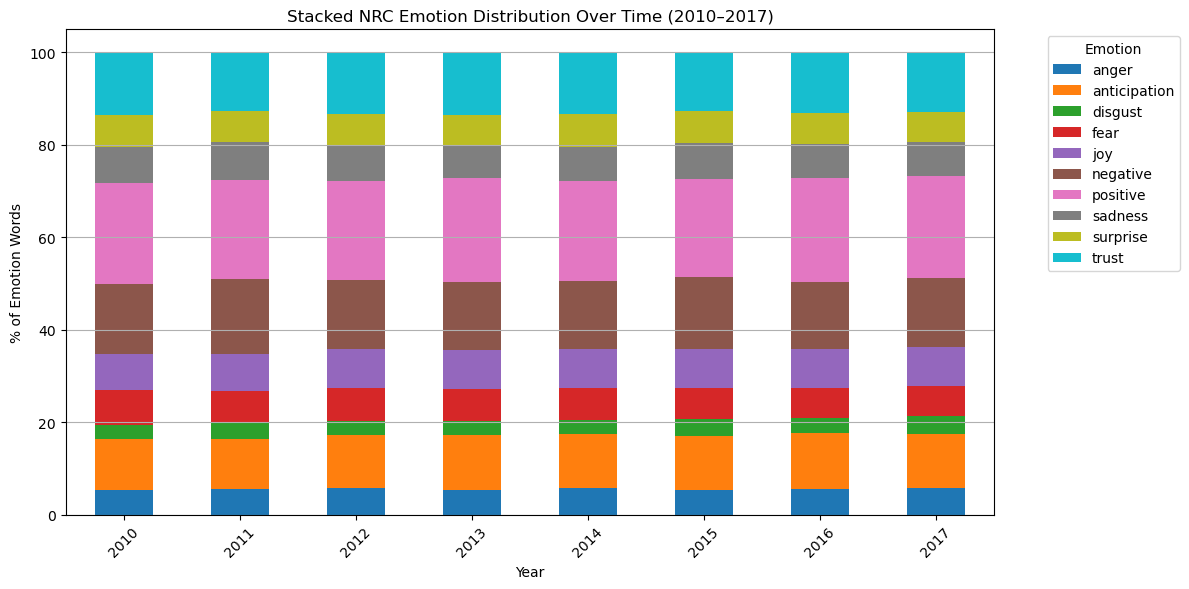

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter: Only include reviews from 2010 onward
df_2010plus = df_topic_labeled[df_topic_labeled['year'] >= 2010]

# Flatten into (year, emotion) rows
emotion_records = []
for _, row in df_2010plus.iterrows():
    if isinstance(row['nrc_emotions'], list):
        for emo in row['nrc_emotions']:
            emotion_records.append((row['year'], emo))

# Build DataFrame
emotion_df = pd.DataFrame(emotion_records, columns=['year', 'emotion'])

# Group and normalize
yearly_counts = emotion_df.groupby(['year', 'emotion']).size().unstack(fill_value=0)
yearly_pct = yearly_counts.div(yearly_counts.sum(axis=1), axis=0) * 100

# Plot
yearly_pct.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab10')
plt.title("Stacked NRC Emotion Distribution Over Time (2010–2017)")
plt.ylabel("% of Emotion Words")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.legend(title="Emotion", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


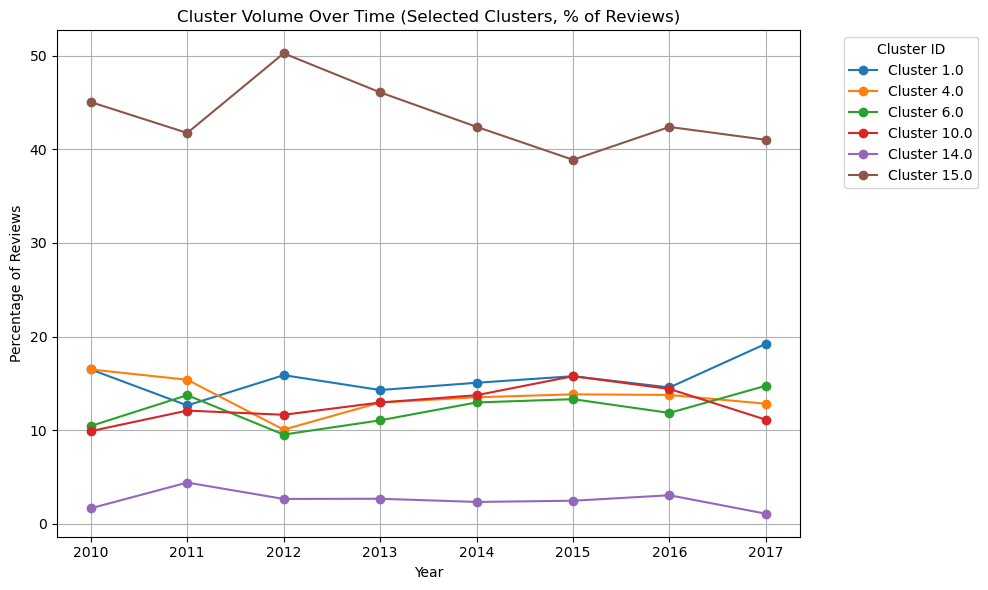

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter for 2010–2017 and selected clusters
selected_clusters = [1, 4, 6, 10, 14, 15]
df_filtered = df_topic_labeled[
    df_topic_labeled['cluster_fixed15'].isin(selected_clusters) &
    df_topic_labeled['year'].between(2010, 2017)
]

# Count reviews per (year, cluster)
cluster_year_counts = (
    df_filtered.groupby(['year', 'cluster_fixed15'])
    .size()
    .unstack(fill_value=0)
)

# Normalize: % of reviews assigned to each cluster per year
cluster_year_pct = cluster_year_counts.div(cluster_year_counts.sum(axis=1), axis=0) * 100

# Plot line chart
plt.figure(figsize=(10, 6))
for cid in cluster_year_pct.columns:
    plt.plot(cluster_year_pct.index, cluster_year_pct[cid], marker='o', label=f'Cluster {cid}')

plt.title('Cluster Volume Over Time (Selected Clusters, % of Reviews)')
plt.xlabel('Year')
plt.ylabel('Percentage of Reviews')
plt.xticks(cluster_year_pct.index)
plt.legend(title='Cluster ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


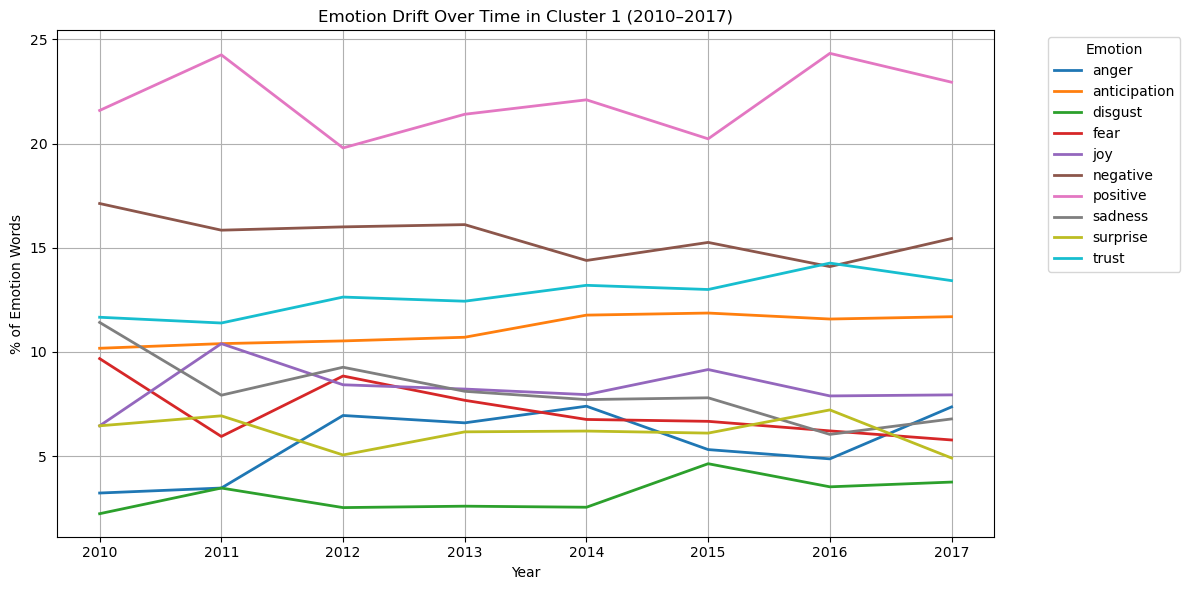

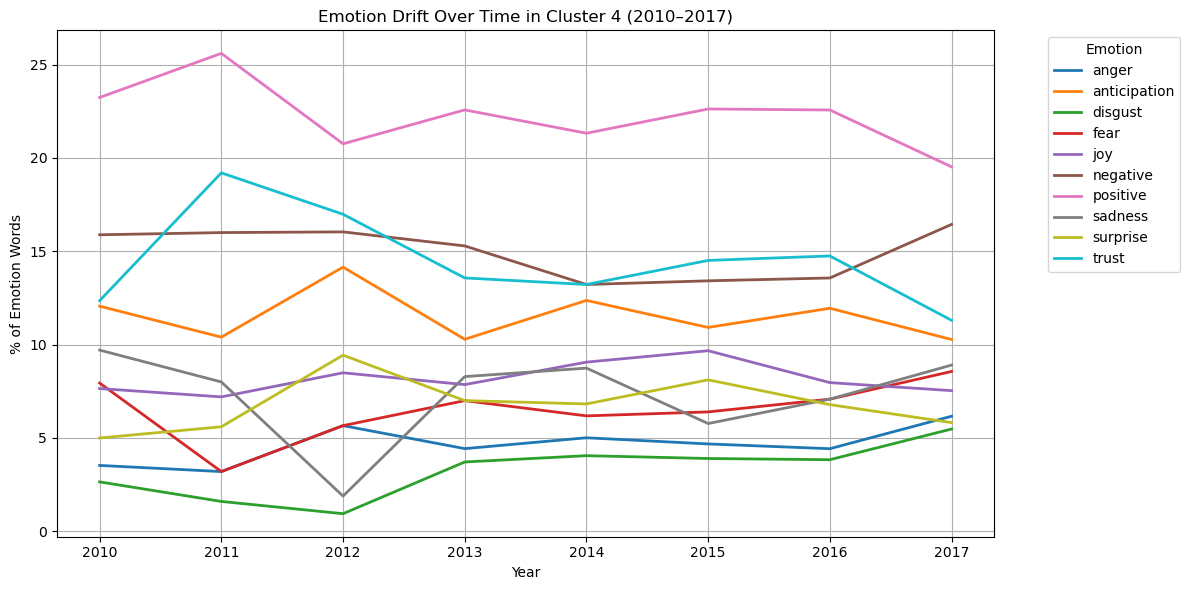

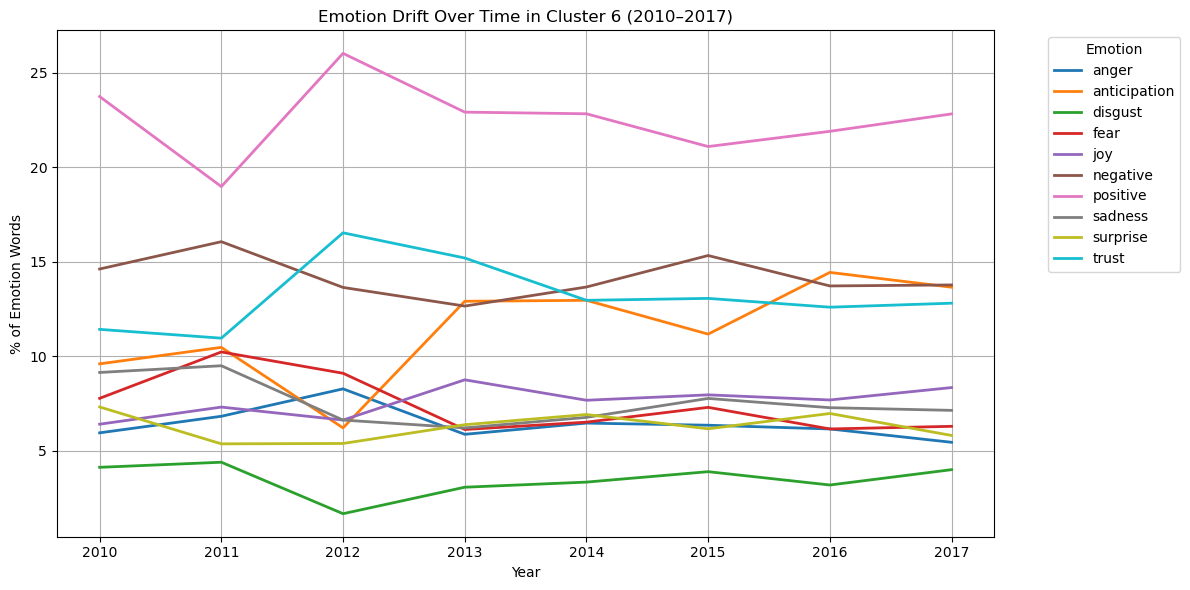

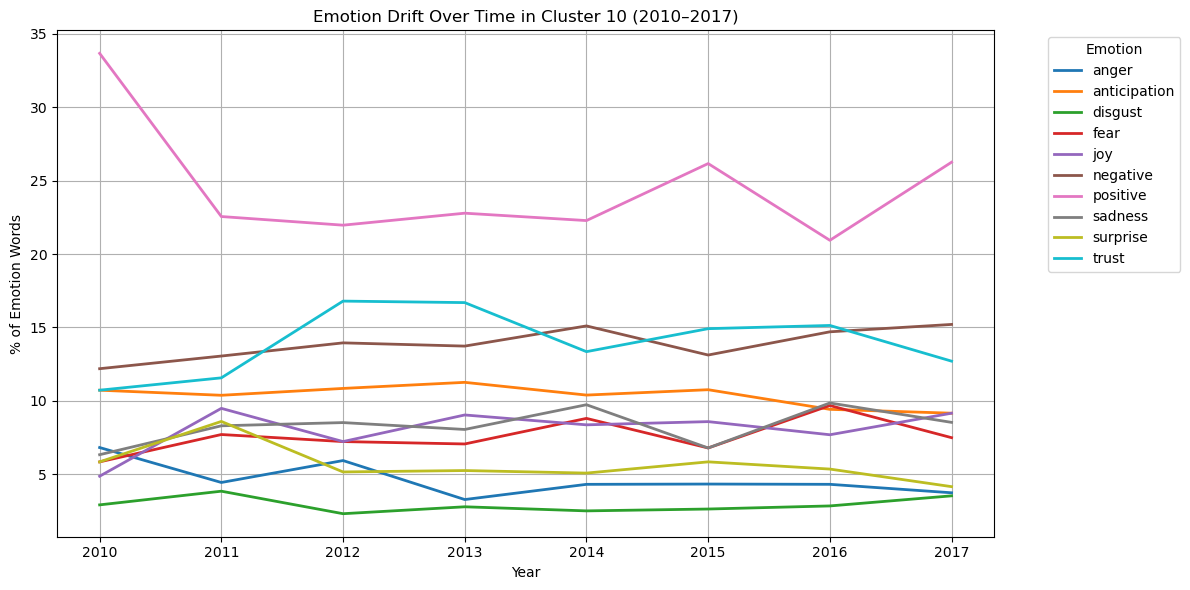

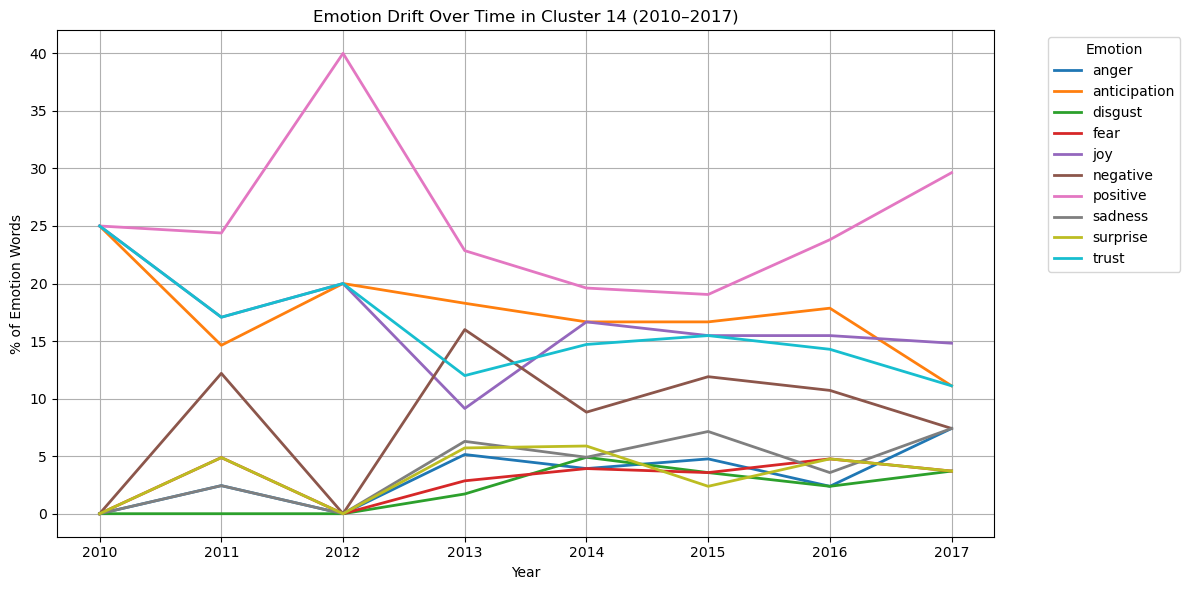

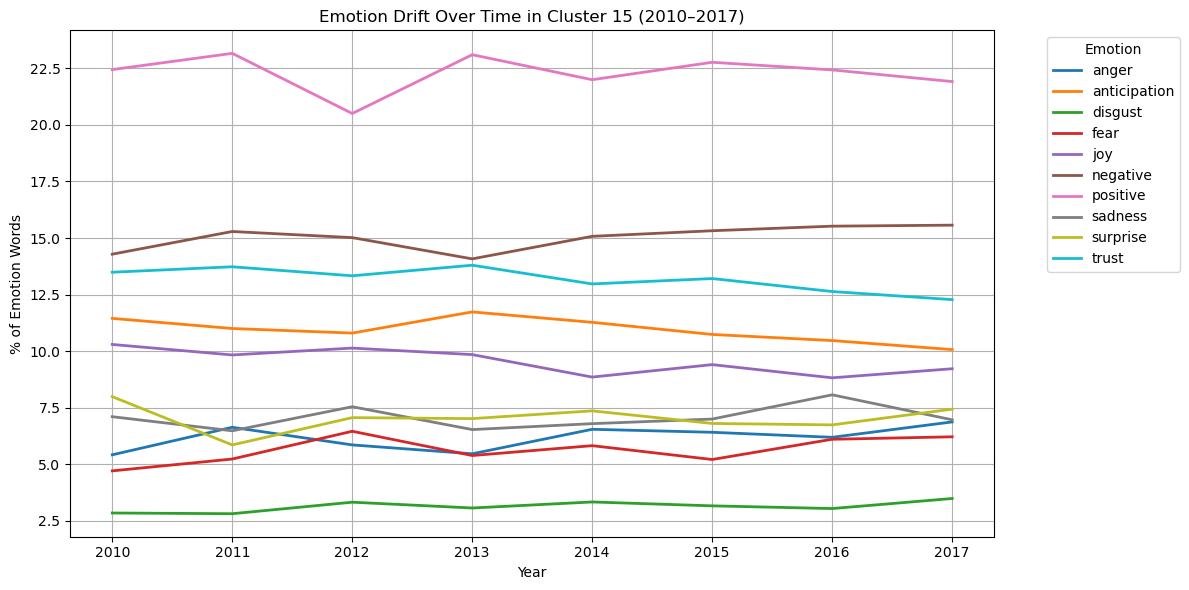

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

# Define clusters to analyze
selected_clusters = [1, 4, 6, 10, 14, 15]

for cid in selected_clusters:
    # Subset for cluster and year ≥ 2010
    df_cluster_year = df_topic_labeled[
        (df_topic_labeled['cluster_fixed15'] == cid) &
        (df_topic_labeled['year'] >= 2010)
    ]

    # Flatten into (year, emotion) rows
    emotion_records = []
    for _, row in df_cluster_year.iterrows():
        if isinstance(row['nrc_emotions'], list):
            for emo in row['nrc_emotions']:
                emotion_records.append((row['year'], emo))

    if not emotion_records:
        print(f"Cluster {cid} has no emotion data.")
        continue

    # Build DataFrame and normalize
    emotion_cluster_df = pd.DataFrame(emotion_records, columns=['year', 'emotion'])
    cluster_year_counts = emotion_cluster_df.groupby(['year', 'emotion']).size().unstack(fill_value=0)
    cluster_year_pct = cluster_year_counts.div(cluster_year_counts.sum(axis=1), axis=0) * 100

    # Plot
    cluster_year_pct.plot(figsize=(12, 6), linewidth=2)
    plt.title(f"Emotion Drift Over Time in Cluster {cid} (2010–2017)")
    plt.ylabel("% of Emotion Words")
    plt.xlabel("Year")
    plt.legend(title="Emotion", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [78]:
from collections import defaultdict, Counter
import pandas as pd

# Clusters you're analyzing
target_clusters = [1, 4, 6, 10, 14, 15]
emotion_categories = ['anger', 'anticipation', 'disgust', 'fear', 'joy',
                      'sadness', 'surprise', 'trust', 'positive', 'negative']

# List to store rows
summary_rows = []

for cluster_id in target_clusters:
    subset = df_topic_labeled[df_topic_labeled['cluster_fixed15'] == cluster_id]
    word_emotion_map = defaultdict(Counter)

    for _, row in subset.iterrows():
        if isinstance(row['cleaned'], str):
            for word in row['cleaned'].split():
                if word in nrc_pivot.index:
                    emotions = nrc_pivot.columns[nrc_pivot.loc[word] == 1]
                    for emo in emotions:
                        word_emotion_map[emo][word] += 1

    # For each emotion, extract top 5 words
    for emo in emotion_categories:
        top_words = word_emotion_map[emo].most_common(5)
        if top_words:
            words = ", ".join([w for w, _ in top_words])
        else:
            words = "-"
        summary_rows.append({
            'Cluster ID': cluster_id,
            'Emotion': emo,
            'Top Words': words
        })

# Create final DataFrame
summary_df = pd.DataFrame(summary_rows)
summary_pivot = summary_df.pivot(index='Emotion', columns='Cluster ID', values='Top Words')
summary_pivot = summary_pivot[sorted(summary_pivot.columns)]  # sort columns by cluster

# Display the summary table
pd.set_option('display.max_colwidth', 100)
display(summary_pivot)


Cluster ID                                            1   \
Emotion                                                    
anger         battery, tighten, money, bad, disappointed   
anticipation              good, time, star, long, pretty   
disgust       larger, weight, bad, disappointed, finally   
fear               case, problem, difficult, weight, bad   
joy                 good, star, pretty, excellent, money   
negative           case, battery, small, problem, bottom   
positive            good, star, pretty, recommend, model   
sadness               case, problem, bottom, weight, bad   
surprise               good, money, larger, deal, weight   
trust           good, star, pretty, recommend, excellent   

Cluster ID                                         4   \
Emotion                                                 
anger           bad, raid, money, complaint, terrible   
anticipation        good, time, star, pretty, thought   
disgust       bad, failure, larger, finally, terrible   
fear                problem, case, bad, raid, failure   
joy                good, star, pretty, money, perfect   
negative             problem, small, cheap, case, bad   
positive        good, warranty, star, pretty, working   
sadness             problem, case, bad, failure, lost   
surprise             good, cable, raid, money, larger   
trust            good, warranty, system, star, pretty   

Cluster ID                                               6   \
Emotion                                                       
anger           wireless, battery, bad, money, disappointed   
anticipation            time, good, wireless, star, network   
disgust       bad, disappointed, finally, weight, defective   
fear                       problem, case, bad, change, fire   
joy                        good, star, found, money, pretty   
negative                 problem, battery, case, bad, small   
positive             good, wireless, star, working, feature   
sadness              problem, case, bad, disappointed, lost   
surprise                 good, wireless, money, deal, cable   
trust                      good, star, found, money, pretty   

Cluster ID                                              10  \
Emotion                                                      
anger            battery, money, disappointed, bad, remove   
anticipation                good, time, star, pretty, long   
disgust       disappointed, bad, finally, weight, powerful   
fear                 case, problem, bad, difficult, change   
joy                        good, star, pretty, love, found   
negative              case, battery, small, problem, cheap   
positive                radio, good, charger, star, pretty   
sadness           case, problem, disappointed, bad, bottom   
surprise               good, cable, money, finally, weight   
trust                    good, cover, star, pretty, magnet   

Cluster ID                                              14  \
Emotion                                                      
anger         disappointed, wireless, bad, shooting, money   
anticipation              pay, good, time, network, pretty   
disgust         disappointed, bad, defective, waste, muddy   
fear                   problem, bad, watch, shooting, pain   
joy                       pay, good, pretty, love, excited   
negative         player, problem, disappointed, bad, wrong   
positive                     pay, good, job, extra, pretty   
sadness           problem, disappointed, bad, error, music   
surprise            good, wireless, excited, guess, reward   
trust                     pay, good, pretty, excited, fact   

Cluster ID                                               15  
Emotion                                                      
anger             battery, bad, money, disappointed, rating  
anticipation                  good, time, long, star, money  
disgust       bad, disappointed, waste, terrible, defective  
fear                  problem, case, 